<a href="https://colab.research.google.com/github/EvaHuang123/Violation-pridiction-mdoel-/blob/main/Violation_Aug_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd

chunksize = 100000  # Specify the size of each chunk

# Replace 'path/to/text/document.txt' with the path to your text document
with open("/gdrive/MyDrive/BA Project/Violation_2022Aug/2022Aug_Violation.txt", 'r', encoding='iso-8859-1') as f:
    # Initialize an empty list to store the chunks
    chunks = []
    
    # Iterate over each chunk of data
    for chunk in pd.read_csv(f, chunksize=chunksize):
        # Append the chunk to the list of chunks
        chunks.append(chunk)
    
    # Concatenate all the chunks into a single dataframe
    df = pd.concat(chunks, ignore_index=True)
    
    # Print the first 10 rows of the concatenated dataframe
    print(df.head(10))


   UNIQUE_ID  INSP_DATE  DOT_NUMBER VIOL_CODE           BASIC_DESC  \
0  635384790  26-AUG-20     2582962     39216       Unsafe Driving   
1  635384790  26-AUG-20     2582962     3927A  Vehicle Maintenance   
2  635384790  26-AUG-20     2582962     39311  Vehicle Maintenance   
3  635384790  26-AUG-20     2582962    39317B  Vehicle Maintenance   
4  635384790  26-AUG-20     2582962    39617C  Vehicle Maintenance   
5  635384826  26-AUG-20      601324    39395A  Vehicle Maintenance   
6  635384844  26-AUG-20      500579   39282A1       Unsafe Driving   
7  635384853  26-AUG-20     2104948     39216       Unsafe Driving   
8  635384862  26-AUG-20     2584015    3922WC  Vehicle Maintenance   
9  635384862  26-AUG-20     2584015     3939H  Vehicle Maintenance   

  OOS_INDICATOR  OOS_WEIGHT  SEVERITY_WEIGHT  TIME_WEIGHT  TOT_SEVERITY_WGHT  \
0             N           0                7            1                  7   
1             N           0                4            1            

In [ ]:
df.isna().sum()

UNIQUE_ID            0
INSP_DATE            0
DOT_NUMBER           0
VIOL_CODE            0
BASIC_DESC           0
OOS_INDICATOR        0
OOS_WEIGHT           0
SEVERITY_WEIGHT      0
TIME_WEIGHT          0
TOT_SEVERITY_WGHT    0
VIOL_VALUE           0
SECTION_DESC         0
GROUP_DESC           0
VIOL_UNIT            0
dtype: int64

In [ ]:
df.dtypes

UNIQUE_ID             int64
INSP_DATE            object
DOT_NUMBER            int64
VIOL_CODE            object
BASIC_DESC           object
OOS_INDICATOR        object
OOS_WEIGHT            int64
SEVERITY_WEIGHT       int64
TIME_WEIGHT           int64
TOT_SEVERITY_WGHT     int64
VIOL_VALUE            int64
SECTION_DESC         object
GROUP_DESC           object
VIOL_UNIT            object
dtype: object

In [ ]:
df.head()

,UNIQUE_ID,INSP_DATE,DOT_NUMBER,VIOL_CODE,BASIC_DESC,OOS_INDICATOR,OOS_WEIGHT,SEVERITY_WEIGHT,TIME_WEIGHT,TOT_SEVERITY_WGHT,VIOL_VALUE,SECTION_DESC,GROUP_DESC,VIOL_UNIT
0,635384790,26-AUG-20,2582962,39216,Unsafe Driving,N,0,7,1,7,7,Failing to use seat belt while operating a CMV,Seat Belt,D
1,635384790,26-AUG-20,2582962,3927A,Vehicle Maintenance,N,0,4,1,4,4,Driver failing to conduct pre-trip inspection,Inspection Reports,D
2,635384790,26-AUG-20,2582962,39311,Vehicle Maintenance,N,0,3,1,3,3,No or defective lighting devices or reflective...,Reflective Sheeting,1
3,635384790,26-AUG-20,2582962,39317B,Vehicle Maintenance,Y,2,6,1,8,8,No/defective towaway lamps on rear unit,Lighting,1
4,635384790,26-AUG-20,2582962,39617C,Vehicle Maintenance,N,0,4,1,4,4,Operating a CMV without proof of a periodic in...,Inspection Reports,1


In [ ]:
print(df['BASIC_DESC'].count)

<bound method Series.count of 0               Unsafe Driving
1          Vehicle Maintenance
2          Vehicle Maintenance
3          Vehicle Maintenance
4          Vehicle Maintenance
                  ...         
6058000    Vehicle Maintenance
6058001    Vehicle Maintenance
6058002    Vehicle Maintenance
6058003    Vehicle Maintenance
6058004    Vehicle Maintenance
Name: BASIC_DESC, Length: 6058005, dtype: object>


In [ ]:
df['GROUP_DESC'].value_counts()

Brakes All Others                       999330
Clearance Identification Lamps/Other    455749
Lighting                                449666
Tires                                   394540
Windshield/ Glass/ Markings             303179
                                         ...  
Reckless Driving                           771
Fire Hazard - HM                           140
HM Route                                    93
Fraud                                       85
Towing Loaded Bus                           17
Name: GROUP_DESC, Length: 66, dtype: int64

In [ ]:
df['SECTION_DESC'].value_counts()

Inoperable Required Lamp                                                                                        447503
No/discharged/unsecured fire extinguisher                                                                       186959
Operating a CMV without proof of a periodic inspection                                                          186643
Clamp or Roto type brake out-of-adjustment                                                                      166479
Inoperative turn signal                                                                                         163857
                                                                                                                 ...  
Improper securement of paper rolls transported on a flatbed vehicle or in a curtain-sided vehicle                    1
Cargo tank not marked with design or MAWP                                                                            1
Cargo tank loading requirements                 

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
##Unique_ID          - unique identification number for each inspection
##Insp_Date          - the date of the inspection 
##DOT_Number         - Unique number assigned to a company by the DOT
##Viol_Code          - Code of the violation
##BASIC_Desc         - Name of the BASIC   
##OOS_Indicator        - 'Y' means the violation is identified as an Out-Of-Service violation
##OOS_Weight         - The weight that is assigned to a violation if it's identified as an Out-Of-Service violation 
##Severity_Weight       - The severity weight that is assigned to a violation
##Time_Weight         - The time weight that is assigned to a violation
##Total_Severity_Wght     - Total severity weight of a violation 
##Section_Desc        - The description of a violation
##Group_Desc         - The description of the violation group
##Viol_Unit          - The unit a violation is cited against vehicle main unit (1), vehicle secondary unit (2), Driver (D), Co-driver (C)

In [ ]:
df1['OOS_INDICATOR'].replace(['Y','N'],[1,0],inplace = True)

In [ ]:
df=df1.drop(['TIME_WEIGHT',], axis=1)

In [ ]:
df.head()

,UNIQUE_ID,INSP_DATE,DOT_NUMBER,VIOL_CODE,BASIC_DESC,OOS_INDICATOR,OOS_WEIGHT,SEVERITY_WEIGHT,TOT_SEVERITY_WGHT,VIOL_VALUE,SECTION_DESC,GROUP_DESC,VIOL_UNIT
0,635384790,26-AUG-20,2582962,39216,Unsafe Driving,0,0,7,7,7,Failing to use seat belt while operating a CMV,Seat Belt,D
1,635384790,26-AUG-20,2582962,3927A,Vehicle Maintenance,0,0,4,4,4,Driver failing to conduct pre-trip inspection,Inspection Reports,D
2,635384790,26-AUG-20,2582962,39311,Vehicle Maintenance,0,0,3,3,3,No or defective lighting devices or reflective...,Reflective Sheeting,1
3,635384790,26-AUG-20,2582962,39317B,Vehicle Maintenance,1,2,6,8,8,No/defective towaway lamps on rear unit,Lighting,1
4,635384790,26-AUG-20,2582962,39617C,Vehicle Maintenance,0,0,4,4,4,Operating a CMV without proof of a periodic in...,Inspection Reports,1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
import seaborn as sns
import csv
import statsmodels.api as sm
import statsmodels.formula.api as smf               # Optional (see below)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures # Optional (see below)

<ipython-input-21-e673c4a62328>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')


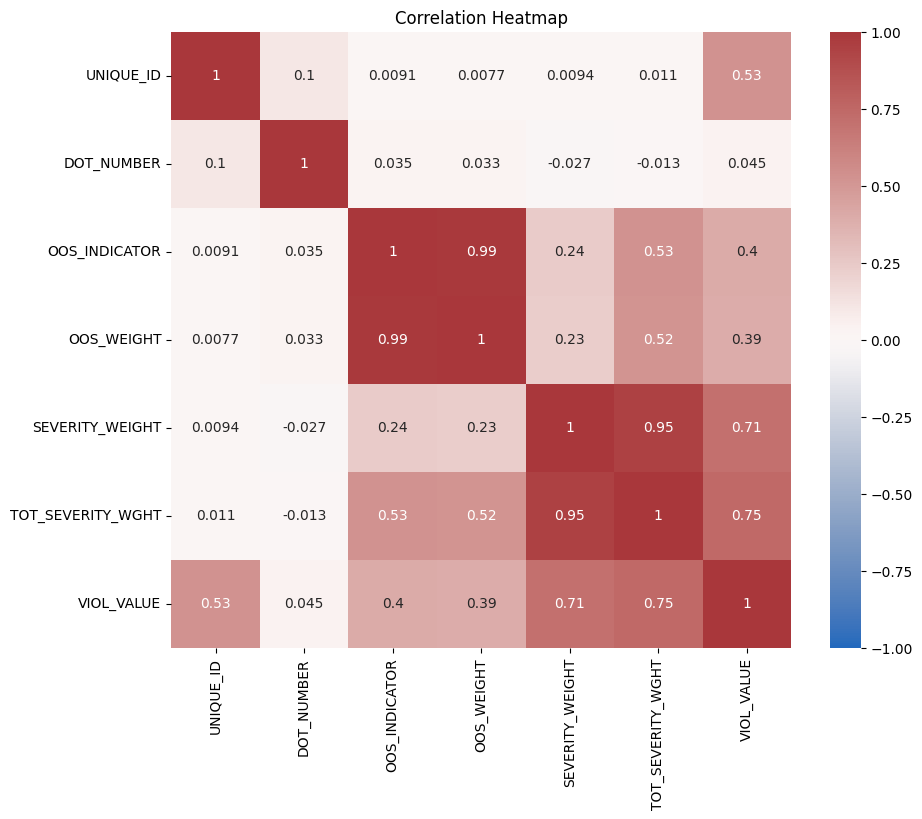

In [ ]:
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')

heatmap.set_title('Correlation Heatmap');

In [ ]:
print(df['BASIC_DESC'].unique())

['Unsafe Driving' 'Vehicle Maintenance' 'Driver Fitness'
 'Hours-of-Service Compliance' 'Hazardous Materials Compliance'
 'Controlled Substances/&#8203;Alcohol']


In [ ]:
print(df['UNIQUE_ID'].unique())

[635384790 635384826 635384844 ... 687977028 687977046 687977055]


In [ ]:
print(df['DOT_NUMBER'].unique())

[2582962  601324  500579 ... 3827864 2979486 3835464]


In [ ]:
violation_df=df[["BASIC_DESC","OOS_INDICATOR", "OOS_WEIGHT","SEVERITY_WEIGHT","TOT_SEVERITY_WGHT","VIOL_VALUE","VIOL_UNIT"]]

In [ ]:
violation_df['BASIC_DESC'].replace(['Unsafe Driving', 'Driver Fitness', 'Vehicle Maintenance',
       'Hours-of-Service Compliance', 'Hazardous Materials Compliance',
       'Controlled Substances/&#8203;Alcohol'],[1,2,3,4,5,6],inplace = True)

<ipython-input-26-56861205b81a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violation_df['BASIC_DESC'].replace(['Unsafe Driving', 'Driver Fitness', 'Vehicle Maintenance',


In [ ]:
violation_df

,BASIC_DESC,OOS_INDICATOR,OOS_WEIGHT,SEVERITY_WEIGHT,TOT_SEVERITY_WGHT,VIOL_VALUE,VIOL_UNIT
0,1,0,0,7,7,7,D
1,3,0,0,4,4,4,D
2,3,0,0,3,3,3,1
3,3,1,2,6,8,8,1
4,3,0,0,4,4,4,1
...,...,...,...,...,...,...,...
6058000,3,0,0,4,4,12,1
6058001,3,0,0,1,1,3,1
6058002,3,1,2,8,10,30,1
6058003,3,0,0,2,2,6,1


<ipython-input-28-b9f2ae5b10d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(violation_df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')


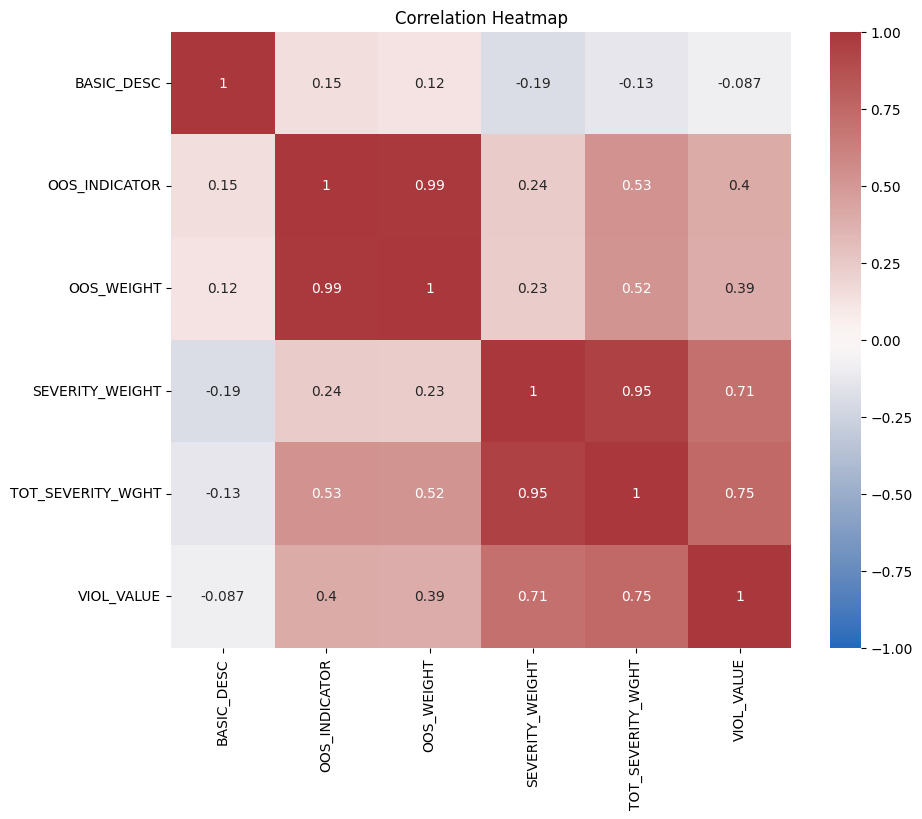

In [ ]:
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(violation_df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')

heatmap.set_title('Correlation Heatmap');

In [ ]:
violation_df.head()

,BASIC_DESC,OOS_INDICATOR,OOS_WEIGHT,SEVERITY_WEIGHT,TOT_SEVERITY_WGHT,VIOL_VALUE,VIOL_UNIT
0,1,0,0,7,7,7,D
1,3,0,0,4,4,4,D
2,3,0,0,3,3,3,1
3,3,1,2,6,8,8,1
4,3,0,0,4,4,4,1


In [ ]:
y=violation_df['VIOL_UNIT']

In [ ]:
violation_df = pd.get_dummies(violation_df, columns=["OOS_INDICATOR"])

In [ ]:
violation_df = pd.get_dummies(violation_df, columns=["BASIC_DESC"])

In [ ]:
violation_df

,OOS_WEIGHT,SEVERITY_WEIGHT,TOT_SEVERITY_WGHT,VIOL_VALUE,VIOL_UNIT,OOS_INDICATOR_0,OOS_INDICATOR_1,BASIC_DESC_1,BASIC_DESC_2,BASIC_DESC_3,BASIC_DESC_4,BASIC_DESC_5,BASIC_DESC_6
0,0,7,7,7,D,1,0,1,0,0,0,0,0
1,0,4,4,4,D,1,0,0,0,1,0,0,0
2,0,3,3,3,1,1,0,0,0,1,0,0,0
3,2,6,8,8,1,0,1,0,0,1,0,0,0
4,0,4,4,4,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058000,0,4,4,12,1,1,0,0,0,1,0,0,0
6058001,0,1,1,3,1,1,0,0,0,1,0,0,0
6058002,2,8,10,30,1,0,1,0,0,1,0,0,0
6058003,0,2,2,6,1,1,0,0,0,1,0,0,0


In [ ]:
predictors = [ "BASIC_DESC_1","BASIC_DESC_2","BASIC_DESC_3","BASIC_DESC_4","BASIC_DESC_5","BASIC_DESC_6","OOS_INDICATOR_0","OOS_INDICATOR_1","TOT_SEVERITY_WGHT","OOS_WEIGHT","VIOL_VALUE","SEVERITY_WEIGHT"]

In [ ]:
predictors

['BASIC_DESC_1',
 'BASIC_DESC_2',
 'BASIC_DESC_3',
 'BASIC_DESC_4',
 'BASIC_DESC_5',
 'BASIC_DESC_6',
 'OOS_INDICATOR_0',
 'OOS_INDICATOR_1',
 'TOT_SEVERITY_WGHT',
 'OOS_WEIGHT',
 'VIOL_VALUE',
 'SEVERITY_WEIGHT']

In [ ]:
X = violation_df[predictors]

In [ ]:
X

,BASIC_DESC_1,BASIC_DESC_2,BASIC_DESC_3,BASIC_DESC_4,BASIC_DESC_5,BASIC_DESC_6,OOS_INDICATOR_0,OOS_INDICATOR_1,TOT_SEVERITY_WGHT,OOS_WEIGHT,VIOL_VALUE,SEVERITY_WEIGHT
0,1,0,0,0,0,0,1,0,7,0,7,7
1,0,0,1,0,0,0,1,0,4,0,4,4
2,0,0,1,0,0,0,1,0,3,0,3,3
3,0,0,1,0,0,0,0,1,8,2,8,6
4,0,0,1,0,0,0,1,0,4,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6058000,0,0,1,0,0,0,1,0,4,0,12,4
6058001,0,0,1,0,0,0,1,0,1,0,3,1
6058002,0,0,1,0,0,0,0,1,10,2,30,8
6058003,0,0,1,0,0,0,1,0,2,0,6,2


In [ ]:
X=violation_df.drop('VIOL_UNIT',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y, test_size=0.3, random_state=5) 

In [ ]:
Xtrain;

In [ ]:
np.shape(Xtrain)

(4240603, 12)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(Xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypred = clf.predict(Xtest)

In [ ]:
# Print classification report metrics.  

print(classification_report(ypred, ytest))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.91      0.71      0.80   1175395
           2       0.24      0.59      0.34    179900
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           C       0.02      0.58      0.04        31
           D       0.98      0.98      0.98    462076

    accuracy                           0.76   1817402
   macro avg       0.27      0.36      0.27   1817402
weighted avg       0.86      0.76      0.80   1817402



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

[4.96224831e-03 7.37162169e-03 1.08049843e-02 2.59139145e-03
 5.59645032e-03 2.21293913e-03 1.49908496e-02 2.89952361e-03
 2.43820795e-01 3.48079291e-04 4.26950119e-03 3.30141598e-06]


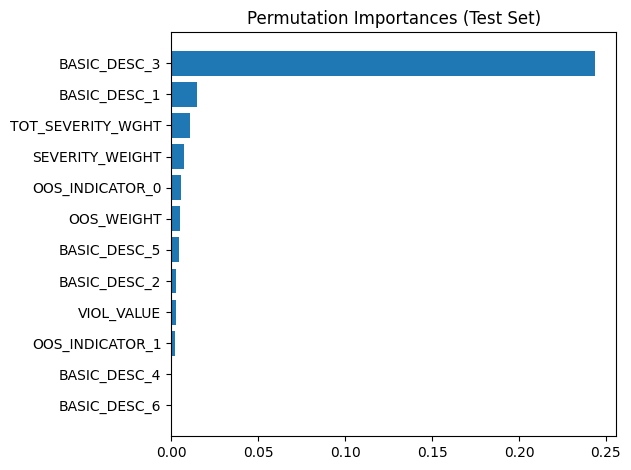

In [ ]:
imps = permutation_importance(clf, Xtest, ytest)
print(imps.importances_mean)

#result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_list = imps.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(Xtest.columns[sorted_list], imps.importances[sorted_list].mean(axis=1).T)
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
model=LogisticRegression(solver='newton-cg')

In [ ]:
X=violation_df.drop('VIOL_UNIT',axis=1)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.25, random_state=0)

In [ ]:
model.fit(Xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(solver='newton-cg')

In [ ]:
ypred=model.predict(Xtest)

In [ ]:
model.score(Xtest,ytest)

0.7509319895252697

In [ ]:
print(classification_report(ytest, ypred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.69      0.92      0.79    757677
           2       0.53      0.16      0.25    364628
           3       0.00      0.00      0.00      3547
           4       0.00      0.00      0.00       438
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         6
           C       0.00      0.00      0.00       725
           D       0.98      0.98      0.98    387471

    accuracy                           0.75   1514502
   macro avg       0.27      0.26      0.25   1514502
weighted avg       0.72      0.75      0.70   1514502



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model=LogisticRegression(multi_class='multinomial')

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.25, random_state=0)

In [ ]:
model.fit(Xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
model.predict(Xtest)

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [ ]:
model.score(Xtest, ytest)

0.7512218537842802

In [ ]:
model.score(Xtrain, ytrain)

0.7512054025275212

([<matplotlib.patches.Wedge at 0x7f5e510fddf0>,
 [Text(-0.0016346476754511537, 1.0999987854206827, '1'),
  Text(-0.7615583323402823, -0.7937436024580534, 'D'),
  Text(0.785046128037091, -0.7705209775560763, '2'),
  Text(1.0999162598081813, -0.013572818778036158, '3'),
  Text(1.09999360171645, -0.0037518239393571576, 'C'),
  Text(1.099999478310648, -0.001071315220938462, '4'),
  Text(1.0999999987470368, -5.25025626371437e-05, '5'),
  Text(1.0999999999072732, -1.4282822079404662e-05, '6')],
 [Text(-0.0008916260047915382, 0.5999993375021906, '50.0%\n(3031868)'),
  Text(-0.41539545400379024, -0.4329510558862109, '25.6%\n(1548669)'),
  Text(0.4282069789293223, -0.4202841695760416, '24.1%\n(1458440)'),
  Text(0.5999543235317352, -0.007403355697110631, '0.2%\n(14262)'),
  Text(0.5999965100271545, -0.0020464494214675402, '0.0%\n(2955)'),
  Text(0.5999997154421716, -0.0005843537568755246, '0.0%\n(1744)'),
  Text(0.5999999993165654, -2.8637761438442013e-05, '0.0%\n(42)'),
  Text(0.59999999994942

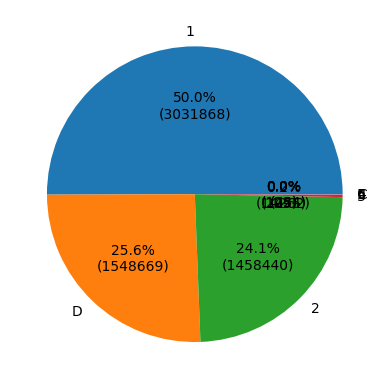

In [69]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['VIOL_UNIT'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

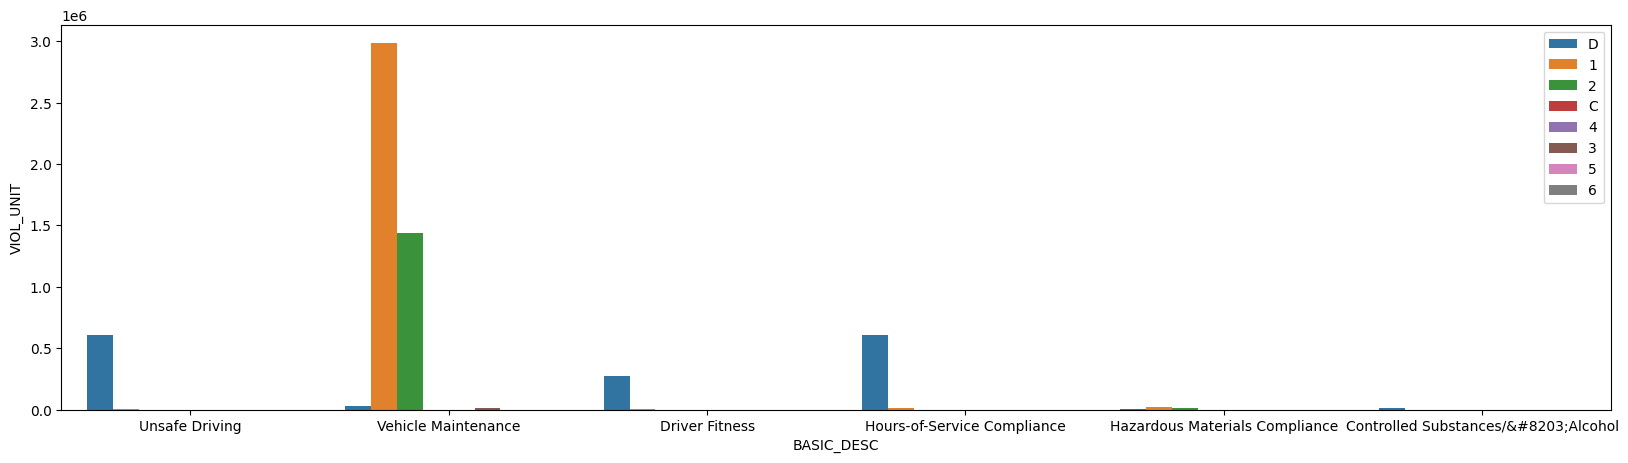

In [70]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(data= df, x='BASIC_DESC', hue='VIOL_UNIT')
#ax.set_title("Income distribution by Age (per income group) ", loc='center', fontweight='bold', fontsize=18)
ax.set_xlabel("BASIC_DESC")
ax.set_ylabel("VIOL_UNIT")
ax.legend(loc="upper right") 